![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [149]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf
print(tensorflow.__version__)


# from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

import glob

2.5.0


## 2. Setting Options

In [11]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [12]:
# To change the directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/CNN/mobile-images')

In [13]:
# Print the list of directories in working directory
os.listdir()

['yes-mobile', 'no-mobile']

In [14]:
# Read the impages from save the pixel details and labels into the arrays. 

import cv2
filepath = "/content/drive/MyDrive/Colab Notebooks/CNN/mobile-images"

yes_images=[]
yes_labels=[]
no_images=[]
no_labels=[]

for i in os.listdir():
    if i == 'no-mobile':
        lbl = 0
    elif i == 'yes-mobile':
        lbl = 1
    imgfiles = glob.glob(filepath+"/"+ i +"/*.png", recursive=True)
    for j in range(0, len(imgfiles)):
        img = cv2.imread(imgfiles[j])
        img = cv2.resize(img, (128,128))
        if lbl == 0:
            no_images.append(img)
            no_labels.append(lbl)
        elif lbl == 1:
            yes_images.append(img)
            yes_labels.append(lbl)


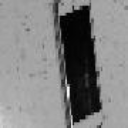

In [17]:
# Plot the sample image
from google.colab.patches import cv2_imshow
cv2_imshow(yes_images[0])


In [18]:
# Print the total number of images with phone
len(yes_images)

124

In [20]:
# Print the total number of images without phone
len(no_images)

121

### Check shape and size of the images

In [21]:
# Print the shape of images with phone
yes_images[10].shape

(128, 128, 3)

- There are 128X128 with 3 channels size

In [22]:
# Print the shape of images without phone
no_images[10].shape

(128, 128, 3)

- There are 128X128 with 3 channels size

###  What is the percentage of images with and without mobile phone in the data

In [23]:
print("Images without Phone", round((len(no_images) / (len(no_images) + len(yes_images)))*100), "%")
print("Images with Phone", round((len(yes_images) / (len(no_images) + len(yes_images)))*100), "%")

Images without Phone 49 %
Images with Phone 51 %


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [24]:
import numpy as np

# Merge the images with phone and without phone
x_img = np.concatenate((yes_images, no_images), axis=0)

In [25]:
type(x_img)

numpy.ndarray

In [26]:
# Print the shape
x_img.shape

(245, 128, 128, 3)

- There are 245 images with 128x128 with 3 channels

In [27]:
# Merge the labels
y_lbl = np.concatenate((yes_labels, no_labels), axis=0)

In [28]:
type(y_lbl)

numpy.ndarray

In [29]:
y_lbl.shape

(245,)

- - There are 245 lables.

In [30]:
# Print the lables.
y_lbl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Shuffle the above data and labels ( Data and label should be in sync)

In [31]:
# Shuffle the images with their labels.
from sklearn.utils import shuffle
data, labels = shuffle(x_img, y_lbl, random_state=95)

In [32]:
labels

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0])

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

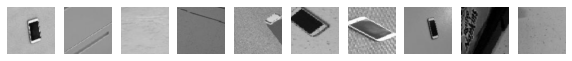

[1 0 0 0 1 1 1 1 0 0]


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
plt.show()
print(labels[:10])

### Split the data into train and test

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,random_state=26)

### Print shape of the X train and X test data

In [36]:
# Print the training set shape
x_train.shape

(183, 128, 128, 3)

- There are 183 images in training set

In [37]:
# Print the test set shape
x_test.shape

(62, 128, 128, 3)

- There are 62 images in test set

### Normalize the data by dividing by 255

In [38]:
# Verify the data before normalization
x_train[0]

array([[[170, 170, 170],
        [170, 170, 170],
        [170, 170, 170],
        ...,
        [175, 175, 175],
        [176, 176, 176],
        [176, 176, 176]],

       [[170, 170, 170],
        [170, 170, 170],
        [170, 170, 170],
        ...,
        [175, 175, 175],
        [176, 176, 176],
        [176, 176, 176]],

       [[170, 170, 170],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [176, 176, 176],
        [176, 176, 176],
        [176, 176, 176]],

       ...,

       [[152, 152, 152],
        [152, 152, 152],
        [151, 151, 151],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [169, 169, 169]],

       [[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [165, 165, 165],
        [164, 164, 164],
        [164, 164, 164]],

       [[147, 147, 147],
        [147, 147, 147],
        [147, 147, 147],
        ...,
        [161, 161, 161],
        [159, 159, 159],
        [159, 159, 159]]

In [39]:
# Apply normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [40]:
# Verify the data after normalization
x_train[0]

array([[[0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        ...,
        [0.68627451, 0.68627451, 0.68627451],
        [0.69019608, 0.69019608, 0.69019608],
        [0.69019608, 0.69019608, 0.69019608]],

       [[0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        ...,
        [0.68627451, 0.68627451, 0.68627451],
        [0.69019608, 0.69019608, 0.69019608],
        [0.69019608, 0.69019608, 0.69019608]],

       [[0.66666667, 0.66666667, 0.66666667],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        [0.65882353, 0.65882353, 0.65882353],
        ...,
        [0.69019608, 0.69019608, 0.69019608],
        [0.69019608, 0.69019608, 0.69019608],
        [0.69019608, 0.69019608, 0.69019608]],

       ...,

       [[0.59607843, 0.59607843, 0.59607843],
        [0.59607843, 0.59607843, 0.59607843],
        [0.59215686, 0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [41]:
# Verify the lable before applying onehot encode
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [42]:
from tensorflow.keras.utils import to_categorical

In [43]:
# Apply onehot encode
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [45]:
# Verify the label after onehot encoding
y_test_cat

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [101]:
from tensorflow.keras.layers import Conv2D, Dropout

#tf.keras.backend.clear_session()
model = Sequential()

# Add convolutional layer with 3x3 filter size and 32 filters
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2))) # Add pooling layer with 2x2 size

# Add another convolutional layer with 3x3 filter size and 64 filters
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2))) # Add pooling layer with 2x2 size

# Add flatten layer
model.add(Flatten())

# Add dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add output layers
model.add(Dense(2,activation='softmax'))


### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [102]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [103]:
# Train the model
training_history = model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=10,batch_size=32)

Epoch 1/10
6/6 [==============================] - 5s 736ms/step - loss: 0.8296 - accuracy: 0.4918 - val_loss: 0.7072 - val_accuracy: 0.4194
Epoch 2/10
6/6 [==============================] - 4s 702ms/step - loss: 0.6332 - accuracy: 0.5410 - val_loss: 0.6061 - val_accuracy: 0.8548
Epoch 3/10
6/6 [==============================] - 4s 696ms/step - loss: 0.5244 - accuracy: 0.8525 - val_loss: 0.4711 - val_accuracy: 0.8548
Epoch 4/10
6/6 [==============================] - 4s 695ms/step - loss: 0.3886 - accuracy: 0.8743 - val_loss: 0.3683 - val_accuracy: 0.8226
Epoch 5/10
6/6 [==============================] - 4s 705ms/step - loss: 0.2931 - accuracy: 0.8852 - val_loss: 0.3551 - val_accuracy: 0.8548
Epoch 6/10
6/6 [==============================] - 4s 696ms/step - loss: 0.2222 - accuracy: 0.9180 - val_loss: 0.4710 - val_accuracy: 0.8387
Epoch 7/10
6/6 [==============================] - 4s 701ms/step - loss: 0.1802 - accuracy: 0.9399 - val_loss: 0.4541 - val_accuracy: 0.8710
Epoch 8/10
6/6 [====

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [104]:
# Evaluate test set
model.evaluate(x_test, y_test_cat, batch_size=32)

2/2 [==============================] - 0s 167ms/step - loss: 0.4671 - accuracy: 0.8710


[0.4671388864517212, 0.8709677457809448]

In [105]:
# Evaluate training set
model.evaluate(x_train, y_train_cat)

6/6 [==============================] - 1s 167ms/step - loss: 0.0758 - accuracy: 0.9781


[0.07577158510684967, 0.9781420826911926]

### Predict label data of the test data and check confusion matrix

In [106]:
# Predict the label for test set
y_pred= np.argmax(model.predict(x_test), axis=1)

# Print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[30,  6],
       [ 2, 24]])

### Display test images and their predicted label for a few samples

1

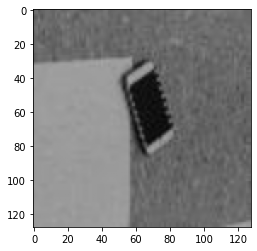

In [107]:
# Plot the image with predicted label
plt.imshow(x_test[0], cmap="gray")
y_pred[0]

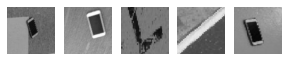

[1 1 1 0 1]


In [108]:
# Plot the image with predicted label
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(5):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis('off')
plt.show()
print(y_pred[:5])

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

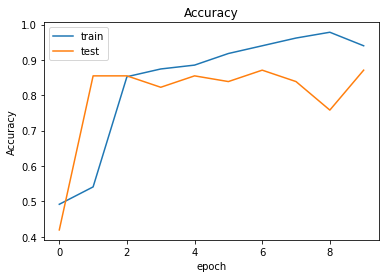

In [109]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

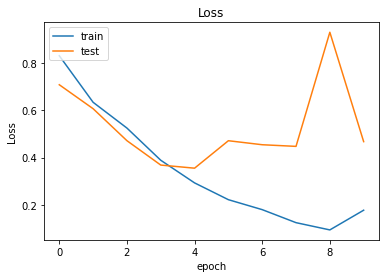

In [110]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

- In above accuracy graph, training accuracy (0.93) is higher than test accuracy (0.87) in last epoch. Training accuracy is raised and test accuracy is down at 8th epoch.
- In Loss graph, training loss (0.1778) is less than test loss (0.4617) in ast epoch. Test loss is raised and training loss is dropped suddenly at 8th epoch. Hence Training accuracy is raised at 8th epoch. 
- It shows that this model is overfit. 

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [150]:
tf.keras.backend.clear_session()
model = Sequential()
# Add the convolutional layer with 3x3 filter size and 64 filters 
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

# Add another convolutional layer with 3x3 filter size and 32 filters
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2))) # Add pooling layer with 2x2 size
model.add(Dropout(0.2))  # Add dropout layer

# Add flatten layer
model.add(Flatten())

# Add dense layers and dropout layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(2,activation='softmax'))


In [151]:
# Complie the model with Adam optimizer learning rate 0.0001 
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers)

In [152]:
# Train the model
training_history = model.fit(x_train,y_train_cat,validation_data=(x_test,y_test_cat),epochs=10,batch_size=25)

Epoch 1/10
8/8 [==============================] - 6s 720ms/step - loss: 0.7012 - accuracy: 0.4918 - val_loss: 0.6919 - val_accuracy: 0.4194
Epoch 2/10
8/8 [==============================] - 6s 695ms/step - loss: 0.6805 - accuracy: 0.5574 - val_loss: 0.6900 - val_accuracy: 0.4194
Epoch 3/10
8/8 [==============================] - 6s 699ms/step - loss: 0.6770 - accuracy: 0.5847 - val_loss: 0.6512 - val_accuracy: 0.8065
Epoch 4/10
8/8 [==============================] - 6s 698ms/step - loss: 0.6513 - accuracy: 0.6339 - val_loss: 0.6249 - val_accuracy: 0.8710
Epoch 5/10
8/8 [==============================] - 6s 701ms/step - loss: 0.6282 - accuracy: 0.6776 - val_loss: 0.6215 - val_accuracy: 0.5161
Epoch 6/10
8/8 [==============================] - 6s 701ms/step - loss: 0.5930 - accuracy: 0.6721 - val_loss: 0.5488 - val_accuracy: 0.8387
Epoch 7/10
8/8 [==============================] - 6s 701ms/step - loss: 0.5624 - accuracy: 0.7486 - val_loss: 0.5083 - val_accuracy: 0.8387
Epoch 8/10
8/8 [====

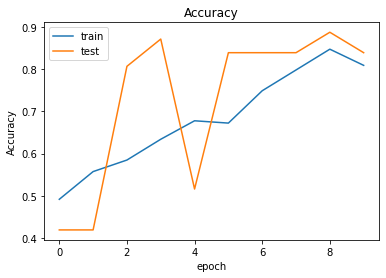

In [153]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

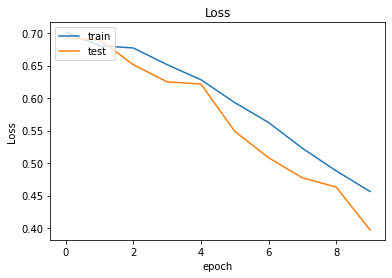

In [154]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [155]:
# Predict the label for test set
y_pred_lbl= np.argmax(model.predict(x_test), axis=1)

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lbl)

array([[32,  4],
       [ 6, 20]])

### Observation:
- As part of performance tuning, increased number of filters in first convolutional layer and decreased number of filters in second convolutional layer. Also, few dropout layers added in the network. 
- This parameter tuning help us to reduce the overfit. 
- Training accuracy is (.80) and test accuracy is (0.83)
- The training loss is 0.4564 and test loss is 0.3973.